#  **Perceptron on MNIST_fashion dataset**


**Problem Statement**

This dataset includes images of certain clothing and accessory. The objective is to classify images into specific classes using single layer perceptron and multilayer perceptron.

**Dataset Description**

Total Images: 70,000

Train Images: 60,000

Test Images: 10,000

Image Size: 28 X 28

Classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'

**Tasks to be Performed:** 

As a part of this assignment I will be performing the following tasks:

* Prepare a detailed python notebook(similar to this one) using multi-layer perceptron for classifing the images from MNIST Fashion Dataset with best accuracy
*  Prepare the dataset for the model
*  Develop Single Layer Perceptron model for classifying the 10 labels of clothes from fashion_mnist dataset
*  Plot the change in accuracy per epochs
*   Evaluate the model on the testing data
*   Analyse the model summary
*   Add hidden layer to the model to make it Multi-Layer Perceptron
*   Add Dropout to prevent overfitting and check its effect on accuracy
*   Increasing the number of Hidden Layer neuron and check its effect on     accuracy
*   Use different optimizers and check its effect on accuracy
*   Manipulate the batch_size and epochs and check its effect on accuracy

**Question:** 

What parameters should be choosen to get best accuracy on classifying the images into various categories?

In [1]:
import tensorflow as tf
from tensorflow import keras

# **Prepare the dataset for the model**

In [2]:
F_mnist = keras.datasets.fashion_mnist 
(X_train, Y_train), (X_test, Y_test) = F_mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [5]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples



# **Develop Single Layer Perceptron model for classifying the 10 labels of clothes from fashion_mnist dataset**

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)
# output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [7]:

def comp(model,opt):
   model.compile( optimizer= opt, loss='categorical_crossentropy',metrics=['accuracy'])


In [8]:
def show_test_acc(model):
   test_loss, test_acc = model.evaluate(X_test, Y_test)
   print('Test accuracy:', test_acc)

In [9]:
def show_summary(model):
   model.build()
   model.summary()

In [10]:
comp(model_0,"sgd")
training = model_0.fit(X_train, Y_train, batch_size= 64, epochs=40, validation_split=0.2) 

Epoch 1/40
750/750 [==============================] - 1s 2ms/step - loss: 1.0288 - accuracy: 0.6805 - val_loss: 0.7542 - val_accuracy: 0.7567
Epoch 2/40
750/750 [==============================] - 1s 2ms/step - loss: 0.7030 - accuracy: 0.7728 - val_loss: 0.6523 - val_accuracy: 0.7877
Epoch 3/40
750/750 [==============================] - 1s 2ms/step - loss: 0.6318 - accuracy: 0.7956 - val_loss: 0.6083 - val_accuracy: 0.8005
Epoch 4/40
750/750 [==============================] - 1s 2ms/step - loss: 0.5934 - accuracy: 0.8078 - val_loss: 0.5797 - val_accuracy: 0.8073
Epoch 5/40
750/750 [==============================] - 1s 1ms/step - loss: 0.5679 - accuracy: 0.8158 - val_loss: 0.5570 - val_accuracy: 0.8155
Epoch 6/40
750/750 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.8208 - val_loss: 0.5440 - val_accuracy: 0.8167
Epoch 7/40
750/750 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.8236 - val_loss: 0.5310 - val_accuracy: 0.8206
Epoch 

# **Plot the change in accuracy per epochs**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


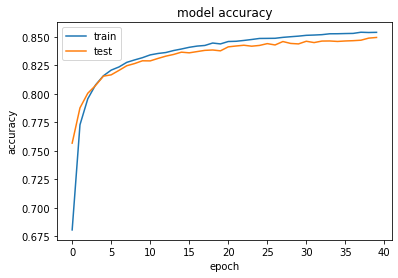

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# **Evaluate the model on the testing data**

In [12]:
show_test_acc(model_0)

313/313 [==============================] - 0s 823us/step - loss: 0.4685 - accuracy: 0.8385
Test accuracy: 0.8385000228881836


# **Analyse the model summary**

In [13]:
show_summary(model_0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# **Add hidden layer to the model to make it Multi-Layer Perceptron**

# **Add Dropout to prevent overfitting and check its effect on accuracy**

In [14]:
from tensorflow.keras.layers import Dropout

model_1 = tf.keras.Sequential()
N_hidden = 64
# Adding a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Adding a dropout value of 0.2 after every layer to prevent overfitting
model_1.add(Dropout(0.2))
model_1.add(Dense(10,name='dense_layer_1', activation='softmax'))


In [15]:
def comp_train(model,opt,b_s,eph):
   model.compile( optimizer= opt, loss='categorical_crossentropy',metrics=['accuracy'])
   model.fit(X_train, Y_train, batch_size= b_s, epochs=eph, validation_split=0.2) 

In [16]:
comp_train(model_1,'sgd',64,40)

Epoch 1/40
750/750 [==============================] - 2s 2ms/step - loss: 1.0866 - accuracy: 0.6430 - val_loss: 0.7189 - val_accuracy: 0.7623
Epoch 2/40
750/750 [==============================] - 1s 2ms/step - loss: 0.7178 - accuracy: 0.7557 - val_loss: 0.6075 - val_accuracy: 0.7951
Epoch 3/40
750/750 [==============================] - 1s 2ms/step - loss: 0.6332 - accuracy: 0.7857 - val_loss: 0.5574 - val_accuracy: 0.8105
Epoch 4/40
750/750 [==============================] - 1s 2ms/step - loss: 0.5865 - accuracy: 0.8006 - val_loss: 0.5280 - val_accuracy: 0.8171
Epoch 5/40
750/750 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.8097 - val_loss: 0.5040 - val_accuracy: 0.8253
Epoch 6/40
750/750 [==============================] - 1s 2ms/step - loss: 0.5315 - accuracy: 0.8162 - val_loss: 0.4899 - val_accuracy: 0.8257
Epoch 7/40
750/750 [==============================] - 1s 2ms/step - loss: 0.5151 - accuracy: 0.8219 - val_loss: 0.4757 - val_accuracy: 0.8311
Epoch 

In [17]:
show_test_acc(model_1)

313/313 [==============================] - 0s 904us/step - loss: 0.3886 - accuracy: 0.8592
Test accuracy: 0.8592000007629395


In [18]:
show_summary(model_1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# **Increasing the number of Hidden Layer neuron and check its effect on accuracy**

In [19]:
model_2 = tf.keras.Sequential()
N_hidden = 64
# Adding two more hidden layers to the previous model  to improve accuracy
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(N_hidden,name="dense_layer_1",activation = 'relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(N_hidden,name="dense_layer_2",activation = 'relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(10,name='dense_layer_3', activation='softmax'))


In [20]:
comp_train(model_2,'sgd',64,30)

Epoch 1/30
750/750 [==============================] - 1s 2ms/step - loss: 1.6162 - accuracy: 0.4054 - val_loss: 0.8889 - val_accuracy: 0.6907
Epoch 2/30
750/750 [==============================] - 1s 2ms/step - loss: 1.0390 - accuracy: 0.6024 - val_loss: 0.7294 - val_accuracy: 0.7182
Epoch 3/30
750/750 [==============================] - 1s 2ms/step - loss: 0.8881 - accuracy: 0.6635 - val_loss: 0.6487 - val_accuracy: 0.7657
Epoch 4/30
750/750 [==============================] - 1s 2ms/step - loss: 0.8066 - accuracy: 0.6986 - val_loss: 0.6006 - val_accuracy: 0.7833
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 0.7499 - accuracy: 0.7234 - val_loss: 0.5666 - val_accuracy: 0.8013
Epoch 6/30
750/750 [==============================] - 1s 2ms/step - loss: 0.7072 - accuracy: 0.7437 - val_loss: 0.5352 - val_accuracy: 0.8100
Epoch 7/30
750/750 [==============================] - 1s 2ms/step - loss: 0.6706 - accuracy: 0.7613 - val_loss: 0.5086 - val_accuracy: 0.8163
Epoch 

In [21]:
show_test_acc(model_2)

313/313 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8553
Test accuracy: 0.8553000092506409


# **Use different optimizers and check its effect on accuracy**

In [22]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout

model_3 = tf.keras.Sequential()
N_hidden = 64

model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(N_hidden,name="dense_layer_1",activation = 'relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(N_hidden,name="dense_layer_2",activation = 'relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(10,name='dense_layer_3', activation='softmax'))


In [23]:
# running the same model with optimizer = "rmsprop"

comp_train(model_3,"rmsprop",64,40)

Epoch 1/40
750/750 [==============================] - 2s 3ms/step - loss: 0.7489 - accuracy: 0.7320 - val_loss: 0.4515 - val_accuracy: 0.8364
Epoch 2/40
750/750 [==============================] - 2s 2ms/step - loss: 0.5071 - accuracy: 0.8227 - val_loss: 0.4065 - val_accuracy: 0.8565
Epoch 3/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4596 - accuracy: 0.8394 - val_loss: 0.3893 - val_accuracy: 0.8621
Epoch 4/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4342 - accuracy: 0.8485 - val_loss: 0.3725 - val_accuracy: 0.8673
Epoch 5/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4167 - accuracy: 0.8537 - val_loss: 0.3821 - val_accuracy: 0.8638
Epoch 6/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4042 - accuracy: 0.8584 - val_loss: 0.3690 - val_accuracy: 0.8710
Epoch 7/40
750/750 [==============================] - 2s 2ms/step - loss: 0.3961 - accuracy: 0.8618 - val_loss: 0.3582 - val_accuracy: 0.8766
Epoch 

In [24]:
show_test_acc(model_3)

313/313 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8738
Test accuracy: 0.8737999796867371


In [25]:
show_summary(model_3)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)               

In [26]:
model_4 = tf.keras.Sequential()
N_hidden = 64

model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(N_hidden,name="dense_layer_1",activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(N_hidden,name="dense_layer_2",activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(10,name='dense_layer_3', activation='softmax'))

In [27]:
# running the same model with optimizer = "adam"

comp_train(model_4,'adam',64,40)


Epoch 1/40
750/750 [==============================] - 2s 2ms/step - loss: 0.8736 - accuracy: 0.6790 - val_loss: 0.4933 - val_accuracy: 0.8226
Epoch 2/40
750/750 [==============================] - 2s 2ms/step - loss: 0.5760 - accuracy: 0.7975 - val_loss: 0.4451 - val_accuracy: 0.8387
Epoch 3/40
750/750 [==============================] - 2s 2ms/step - loss: 0.5176 - accuracy: 0.8179 - val_loss: 0.4193 - val_accuracy: 0.8468
Epoch 4/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4860 - accuracy: 0.8301 - val_loss: 0.3880 - val_accuracy: 0.8556
Epoch 5/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4659 - accuracy: 0.8357 - val_loss: 0.3783 - val_accuracy: 0.8606
Epoch 6/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4585 - accuracy: 0.8379 - val_loss: 0.3874 - val_accuracy: 0.8622
Epoch 7/40
750/750 [==============================] - 2s 2ms/step - loss: 0.4413 - accuracy: 0.8441 - val_loss: 0.4025 - val_accuracy: 0.8550
Epoch 

In [28]:
show_test_acc(model_4)

313/313 [==============================] - 0s 944us/step - loss: 0.3699 - accuracy: 0.8722
Test accuracy: 0.8722000122070312


# **Manipulate the batch_size and epochs and check its effect on accuracy**

In [29]:
model_5 = tf.keras.Sequential()
N_hidden = 128

model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
model_5.add(Dropout(0.4))
model_5.add(Dense(N_hidden,name="dense_layer_1",activation = 'relu'))
model_5.add(Dropout(0.4))
model_5.add(Dense(N_hidden,name="dense_layer_2",activation = 'relu'))
model_5.add(Dropout(0.4))
model_5.add(Dense(10,name='dense_layer_3', activation='softmax'))


In [30]:
comp_train(model_5,"sgd",128,30)

Epoch 1/30
375/375 [==============================] - 1s 4ms/step - loss: 1.8984 - accuracy: 0.3140 - val_loss: 1.1678 - val_accuracy: 0.6247
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 1.2839 - accuracy: 0.5154 - val_loss: 0.8500 - val_accuracy: 0.6964
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 1.0545 - accuracy: 0.6003 - val_loss: 0.7547 - val_accuracy: 0.7224
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: 0.9435 - accuracy: 0.6426 - val_loss: 0.6962 - val_accuracy: 0.7406
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 0.8749 - accuracy: 0.6720 - val_loss: 0.6567 - val_accuracy: 0.7556
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.8210 - accuracy: 0.6956 - val_loss: 0.6237 - val_accuracy: 0.7669
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 0.7838 - accuracy: 0.7119 - val_loss: 0.5952 - val_accuracy: 0.7711
Epoch 

In [31]:
show_test_acc(model_5)

313/313 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8453
Test accuracy: 0.845300018787384


In [32]:
comp_train(model_5,"Adam",128,30)

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 0.5372 - accuracy: 0.8155 - val_loss: 0.4132 - val_accuracy: 0.8521
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 0.4884 - accuracy: 0.8291 - val_loss: 0.3959 - val_accuracy: 0.8579
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 0.4593 - accuracy: 0.8353 - val_loss: 0.3796 - val_accuracy: 0.8644
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: 0.4430 - accuracy: 0.8429 - val_loss: 0.3749 - val_accuracy: 0.8648
Epoch 5/30
375/375 [==============================] - 2s 4ms/step - loss: 0.4317 - accuracy: 0.8474 - val_loss: 0.3708 - val_accuracy: 0.8615
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.4193 - accuracy: 0.8504 - val_loss: 0.3654 - val_accuracy: 0.8708
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 0.4102 - accuracy: 0.8536 - val_loss: 0.3539 - val_accuracy: 0.8717
Epoch 

In [33]:
show_test_acc(model_5)

313/313 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8761
Test accuracy: 0.8761000037193298


# **Answer:**
**What parameters should be choosen to get best accuracy on classifying the images into various categories?**

*The best accuracy that we gained was* 

*training set accuracy : 88.16%* 

*validation set accuracy : 88.53%*  

*test set accuracy : 87.61 %* 

and the parameters used were **optimiser : Adam, batch_size : 128 and epoch : 30.**